<a href="https://colab.research.google.com/github/alyaarslan/dsa210project/blob/main/DSA210PROJECT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Progress Report**

### **1.Data Cleaning and Transferring**

The initial stage of the project invloved **importing and cleaning** three personal datasets, all exported from Samsung.
    
 Two of them came from **Sleep Data**, which included daily **sleep duration** in minutes and a **sleep quality** out of 100 which was determined by Samsung for each day. The exported data was thousands of lines long with unnecessary information and metadata but with the help of AI, I was able to determine which information I needed between the **1st of July and 30th of September 2024**, and extracted the two datasets I was going to use in my project.

 My third dataset was **Screen Time Data**, total daily phone use in minutes, which was considerably easier to work with as the exported data from Samsung only included the exact data I needed, I only had to manually convert the data from an hour format to a minute one.

After I had all the datasets, I made sure the formats and the time window aligned, and I merged them using a **common date column**. I wanted to compare them all with each other in the search of finding a correlation, so my next step was to **graph out the data** and **compare them**.

###  **2.Analyzing Data Sets Seperatly**

For the visualization of the **screen time graph**, I used a **line graph** to see how it fluctuated **from July to September**. Then I used a **histogram** to see it's distribution clearly and it revealed a **bimodal distribution**, which peaked around 330 (5.5 hours) and 450 (7.5 hours) minutes, indicating **two usage routines**.

Next was the **sleep graphs**, and I plotted different graphs for both sleep duration and sleep quality and their respective distributions. Most sleep durations fell between **6.5 and 10.5 hours**, peaking near 510-550 (8.5-9 hours), while sleep quality scores clustered around **80-85** with a few notable dips on days with either extremely short or lond sleep duraitons. Box plots by weekday indicated some variation, it showed longer sleep durations often occured on **Fridays and Wednesdays**, which was the result of me not having classes on wednesdays or fridays in the Summer 2024 semester.

 ### **3.Hyphothesis Testing and Analyzing Data Mergers**
    
Before comparing Screentime and Sleep Data, I wanted to see if there was any correlation between **Sleep Time and Sleep Quality**, so I created a **dual-axis time series graph** of them to see if I could spot any visual correlation between them. I observed that extreme sleep durations led to lower sleep scores so with this alternative hypothesis I checked their Pearson coefficient for a definitive result and got the coefficient as **-0.554** and their **P-value was 0.00000010**, so I **rejected** the null hypothesis and proved that extreme sleep durations were  associated significantly with lower sleep quality scores.

After finding the relationship between the Sleep Datasets, I moved on to make a **multi-line time series graph** of all three datasets to see if I could once again observe a visual correlation. I failed to make one, so I deicded to make a **heatmap** to see if I could observe a correlation between the Sleep and Screentime Datasets. As there was no significant relationship between them, I checked the Pearson coefficient of both **Screentime and sleep duration** and got a **p-value of 0.9162** and of **Screentime and sleep quality** and got a **p-value of 0.6909**. So, I **failed to reject** the null hypothesis on both comparisons and proved that there was **no statistically significant relationship between my Screentime and Sleep Data**.





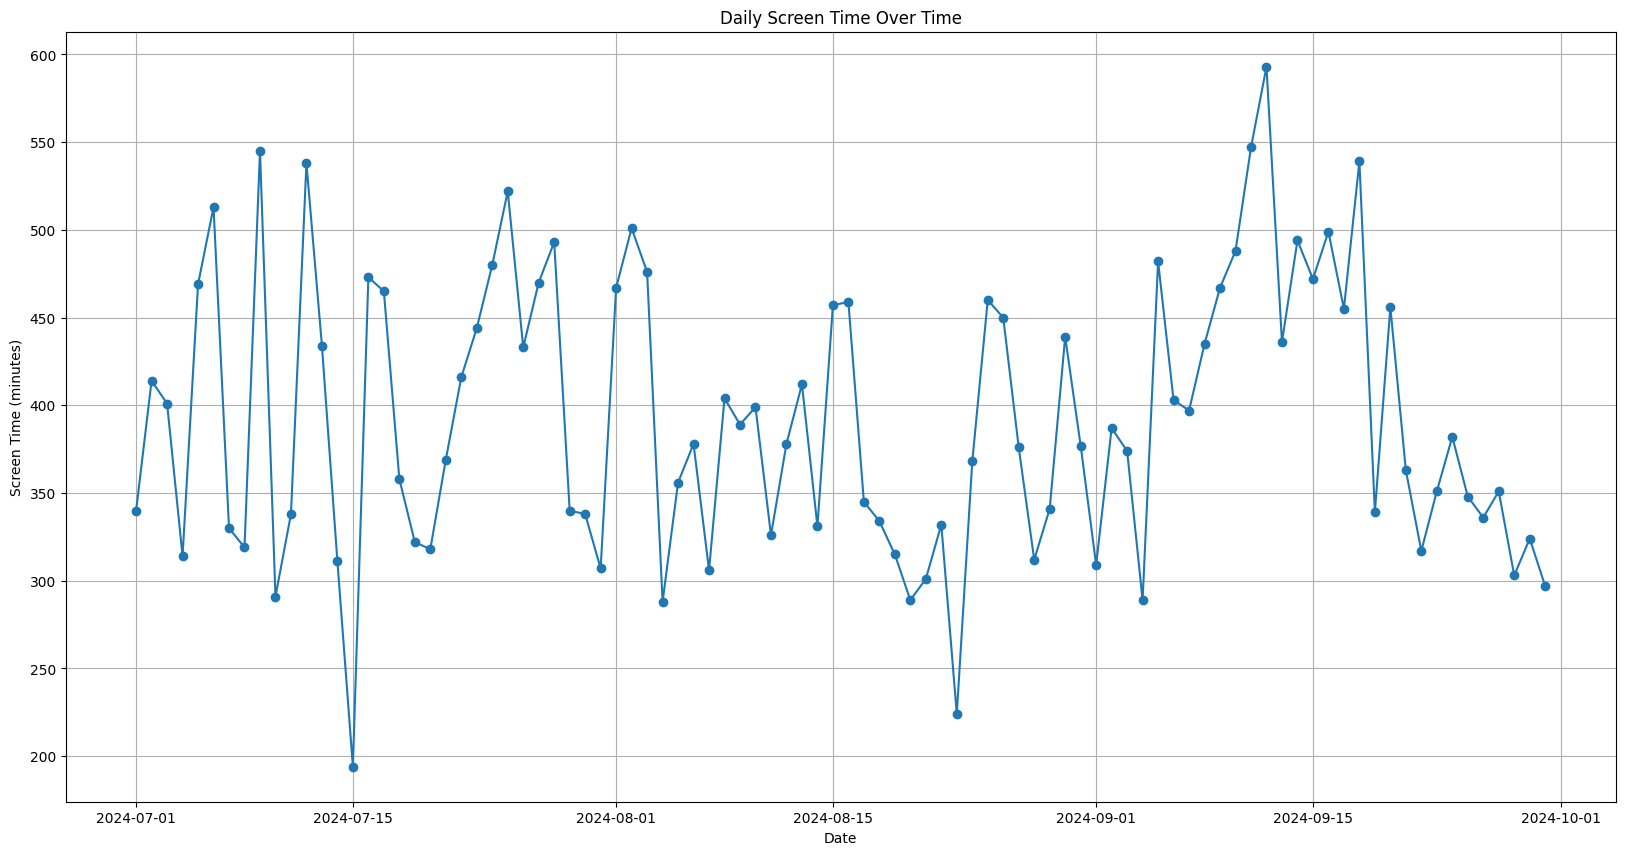

<function matplotlib.pyplot.show(close=None, block=None)>

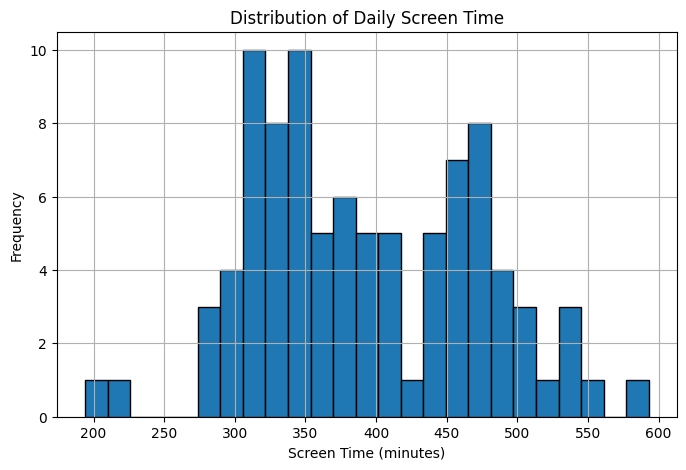

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Alya_screentime.csv")

df['DATE'] = pd.to_datetime(df['DATE'])

df['Weekday'] = df['DATE'].dt.day_name()
df['Month'] = df['DATE'].dt.month_name()

mean_time = df['TIME(min)'].mean()
median_time = df['TIME(min)'].median()
std_dev_time = df['TIME(min)'].std()

Q1 = df['TIME(min)'].quantile(0.25)
Q3 = df['TIME(min)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TIME(min)'] < Q1 - 1.5 * IQR) | (df['TIME(min)'] > Q3 + 1.5 * IQR)]

weekday_avg = df.groupby('Weekday')['TIME(min)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
monthly_avg = df.groupby('Month')['TIME(min)'].mean()

plt.figure(figsize=(20, 10))
plt.plot(df['DATE'], df['TIME(min)'], marker='o')
plt.title('Daily Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Screen Time (minutes)')
plt.grid(True)
plt.subplots_adjust()

plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df['TIME(min)'], bins=25, edgecolor='black')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Screen Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplots_adjust()
plt.show

Summary Statistics:
                      date  sleeptime_min  sleep_quality
count                   80      80.000000      80.000000
mean   2024-08-09 12:00:00     499.287500      80.737500
min    2024-07-01 00:00:00     236.000000      38.000000
25%    2024-07-20 18:00:00     443.000000      77.000000
50%    2024-08-09 12:00:00     506.500000      81.500000
75%    2024-08-29 06:00:00     572.750000      87.000000
max    2024-09-18 00:00:00     727.000000      99.000000
std                    NaN      99.799571       9.546348

Correlation Matrix:
               sleeptime_min  sleep_quality
sleeptime_min       1.000000       0.114024
sleep_quality       0.114024       1.000000


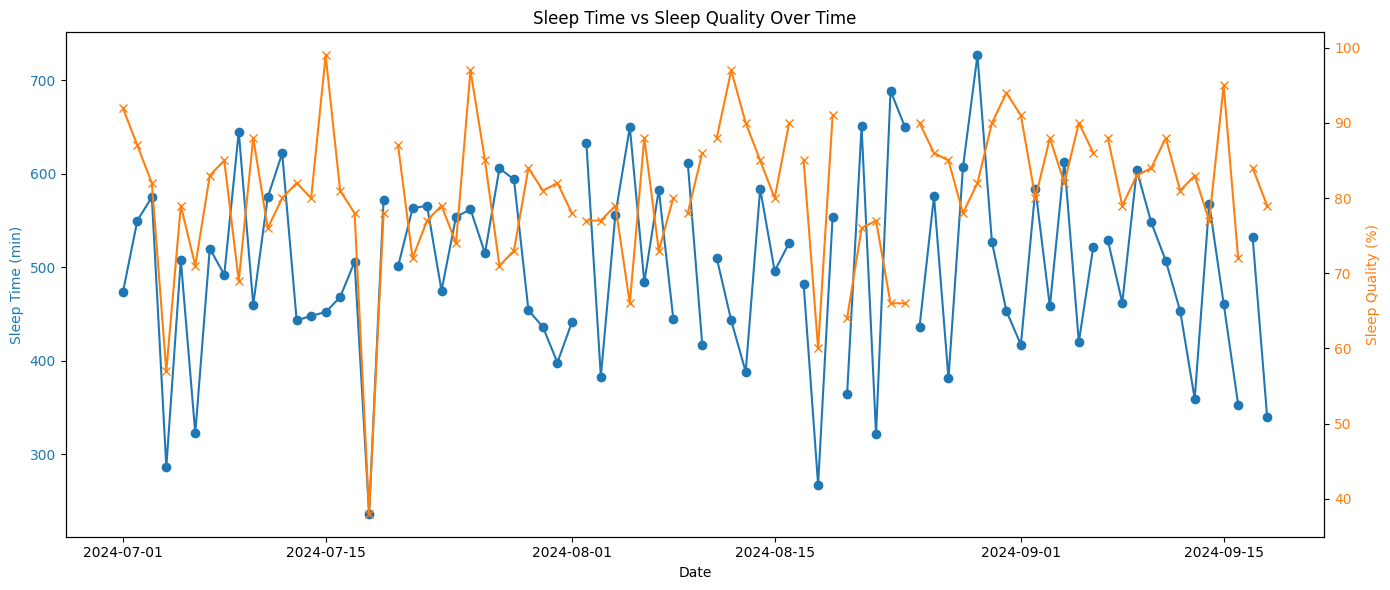

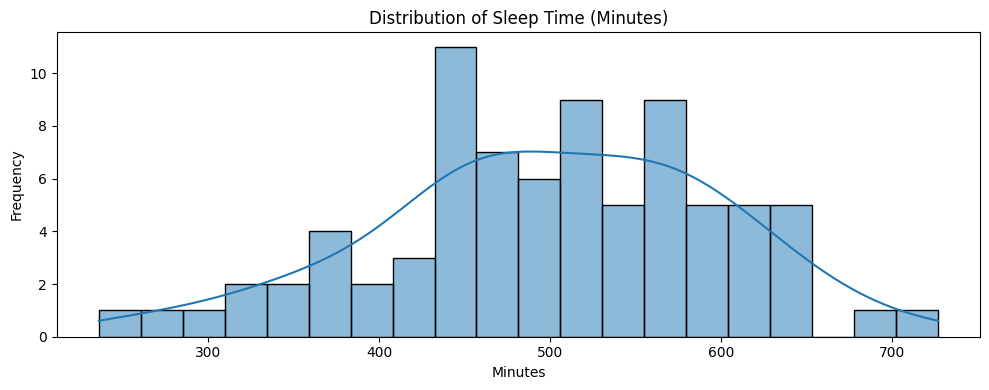

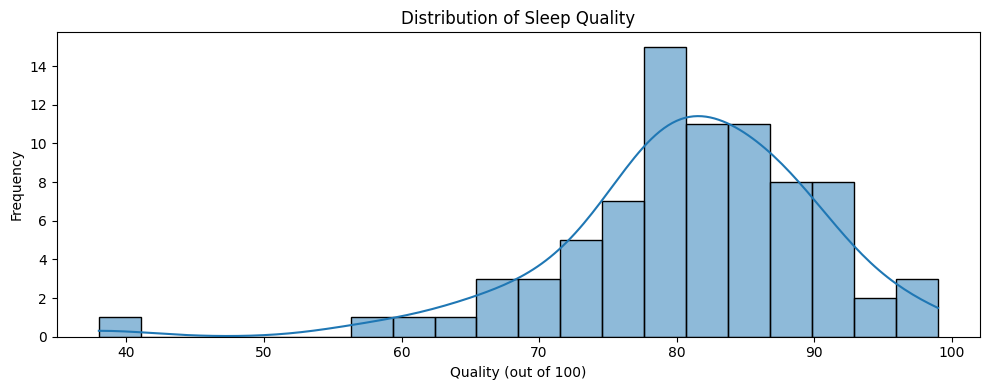

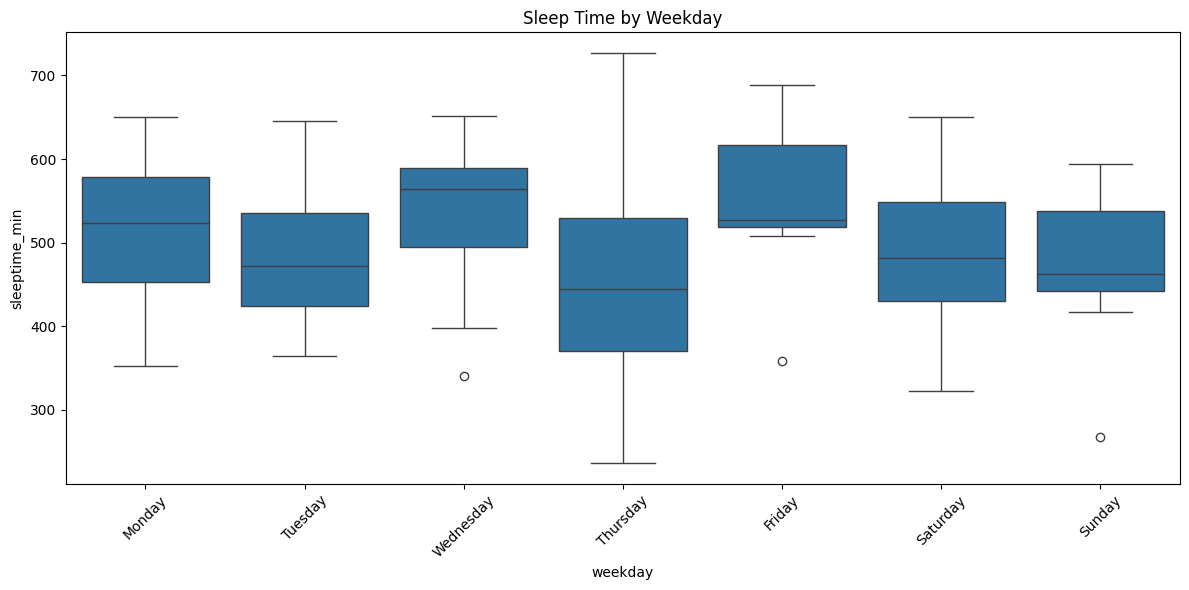

Analysis complete. Outputs saved.


In [24]:

from datetime import datetime

df = pd.read_csv("Formatted_Sleep_Data.csv")

df["sleeptime_min"] = pd.to_numeric(df["sleeptime_min"], errors="coerce")
df["sleep_quality"] = pd.to_numeric(df["sleep_quality"], errors="coerce")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

df["weekday"] = df["date"].dt.day_name()

print("Summary Statistics:")
print(df.describe())

print("\nCorrelation Matrix:")
print(df[["sleeptime_min", "sleep_quality"]].corr())

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Sleep Time (min)", color='tab:blue')
ax1.plot(df["date"], df["sleeptime_min"], label="Sleep Time", color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel("Sleep Quality (%)", color='tab:orange')
ax2.plot(df["date"], df["sleep_quality"], label="Sleep Quality", color='tab:orange', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Sleep Time vs Sleep Quality Over Time")
fig.tight_layout()
plt.savefig("sleep_trends_dual_axis.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 4))
sns.histplot(df["sleeptime_min"], kde=True, bins=20)
plt.title("Distribution of Sleep Time (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("sleep_time_histogram.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 4))
sns.histplot(df["sleep_quality"], kde=True, bins=20)
plt.title("Distribution of Sleep Quality")
plt.xlabel("Quality (out of 100)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("sleep_quality_histogram.png")
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="weekday", y="sleeptime_min",
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Sleep Time by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sleep_by_weekday.png")
plt.show()
plt.close()

df["sleep_change"] = df["sleeptime_min"].diff()
df["quality_change"] = df["sleep_quality"].diff()

df.to_csv("Analyzed_Sleep_Data.csv", index=False)
print("Analysis complete. Outputs saved.")

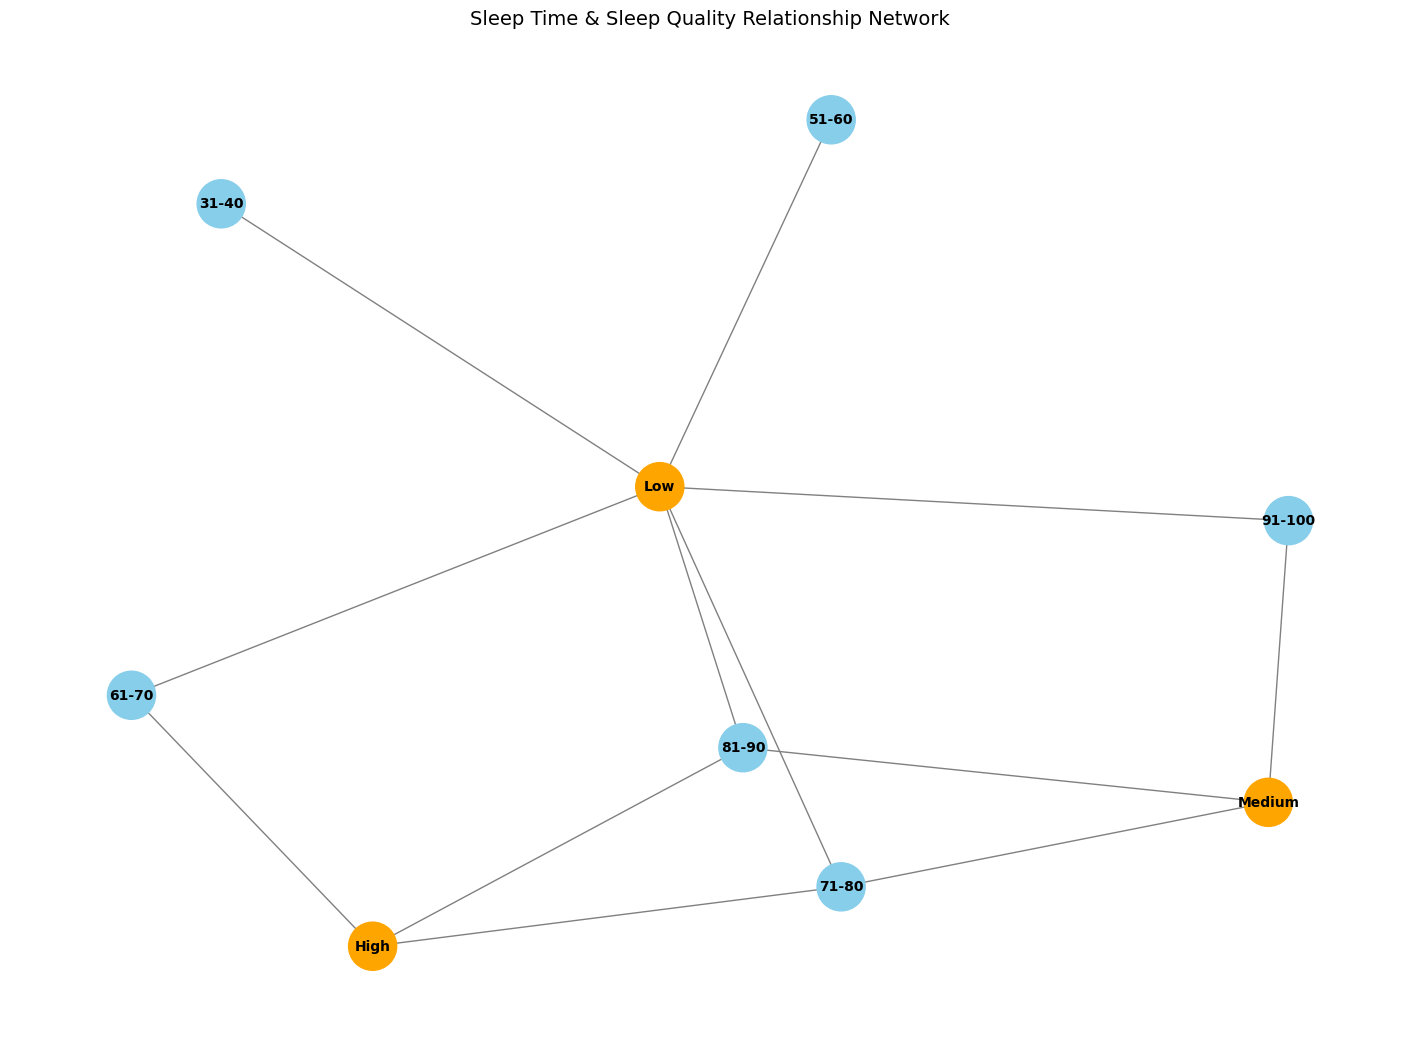

In [31]:
import networkx as nx


df = pd.read_csv("Analyzed_Sleep_Data.csv")

df = df.dropna(subset=["sleeptime_min", "sleep_quality"])

def categorize_sleep_time(minutes):
    if minutes < 390:
        return "Low"
    elif minutes < 570:
        return "Medium"
    else:
        return "High"

def categorize_quality(quality):
    bucket = int(quality) // 10
    lower = bucket * 10 + 1
    upper = (bucket + 1) * 10
    return f"{lower}-{upper}"

df["sleep_time_group"] = df["sleeptime_min"].apply(categorize_sleep_time)
df["quality_group"] = df["sleep_quality"].apply(categorize_quality)

G = nx.Graph()

for group in ["Low", "Medium", "High"]:
    G.add_node(group, color="orange")

for qgroup in sorted(df["quality_group"].unique()):
    G.add_node(qgroup, color="skyblue")

for _, row in df.iterrows():
    G.add_edge(row["sleep_time_group"], row["quality_group"])

pos = nx.spring_layout(G, seed=42)
colors = [G.nodes[n]["color"] for n in G.nodes]

plt.figure(figsize=(14, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=1200,
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)
plt.title("Sleep Time & Sleep Quality Relationship Network", fontsize=14)
plt.show()

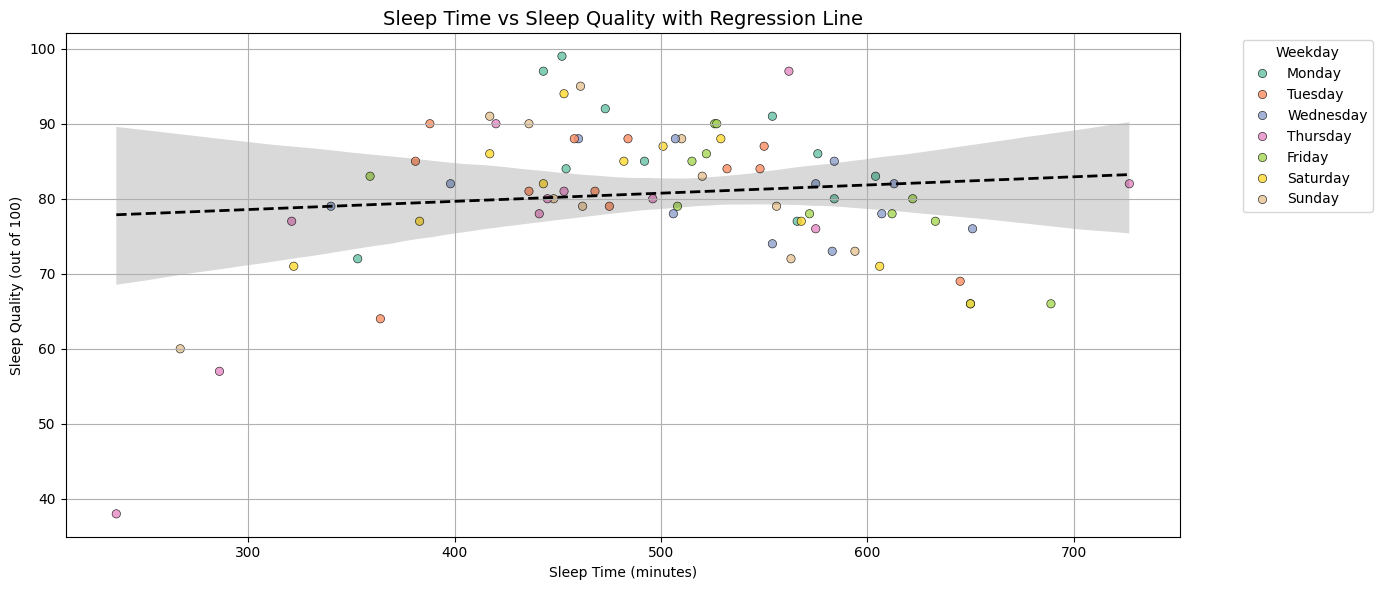

In [26]:
df = pd.read_csv("Analyzed_Sleep_Data.csv")

df = df.dropna(subset=["sleeptime_min", "sleep_quality"])
df["sleeptime_min"] = pd.to_numeric(df["sleeptime_min"])
df["sleep_quality"] = pd.to_numeric(df["sleep_quality"])
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["weekday"] = df["date"].dt.day_name()

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df,
    x="sleeptime_min",
    y="sleep_quality",
    hue="weekday",
    palette="Set2",
    alpha=0.8,
    edgecolor="black"
)

sns.regplot(
    data=df,
    x="sleeptime_min",
    y="sleep_quality",
    scatter=False,
    color="black",
    line_kws={"linewidth": 2, "linestyle": "dashed"}
)

plt.title("Sleep Time vs Sleep Quality with Regression Line", fontsize=14)
plt.xlabel("Sleep Time (minutes)")
plt.ylabel("Sleep Quality (out of 100)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Weekday", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot shows the relationship between daily sleep duration (in minutes) and sleep quality (out of 100), with points colored by weekday. A dashed regression line indicates a slight positive trend: longer sleep generally aligns with better quality, though the effect is weak. Most high-quality scores cluster between 7.5–9 hours of sleep, suggesting this as an optimal range. Variations across weekdays may reflect lifestyle or routine influences.


In [27]:
from scipy.stats import pearsonr

df = pd.read_csv("Analyzed_Sleep_Data.csv")

df = df.dropna(subset=["sleeptime_min", "sleep_quality"])

df["sleeptime_min"] = pd.to_numeric(df["sleeptime_min"], errors="coerce")
df["sleep_quality"] = pd.to_numeric(df["sleep_quality"], errors="coerce")

r, p_value = pearsonr(df["sleeptime_min"], df["sleep_quality"])

print(f"Pearson correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.114
P-value: 0.3139


The Pearson correlation analysis between sleep duration and sleep quality yielded a coefficient of 0.114 with a p-value of 0.3139, indicating a weak and statistically insignificant linear relationship. This suggests that, within this dataset, longer sleep does not reliably correlate with higher quality ratings. While there may be a slight positive trend, it lacks enough consistency or strength to draw meaningful conclusions. Sleep quality likely depends on additional factors beyond just duration, such as timing, regularity, or personal conditions on specific days.

In [28]:
df["extreme_sleep"] = df["sleeptime_min"].apply(lambda x: 1 if x < 390 or x > 630 else 0)

r, p_value = pearsonr(df["extreme_sleep"], df["sleep_quality"])

print(f"Pearson correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.8f}")

if p_value < 0.05:
    print("This is statistically significant. Extreme sleep durations are associated with lower sleep quality.")
else:
    print("This is not statistically significant. No clear evidence that extreme sleep impacts quality.")

Pearson correlation coefficient: -0.554
P-value: 0.00000010
This is statistically significant. Extreme sleep durations are associated with lower sleep quality.


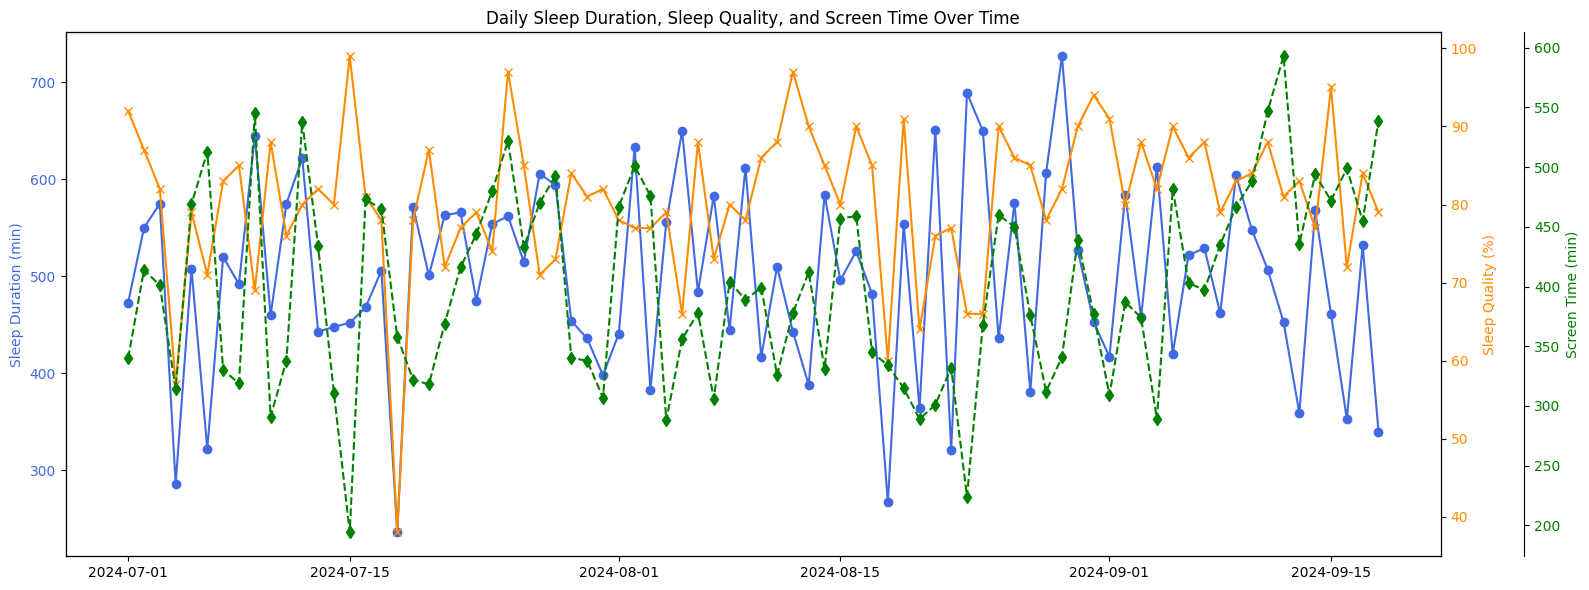

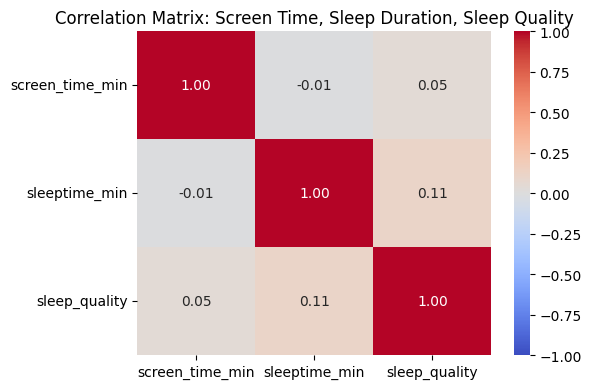

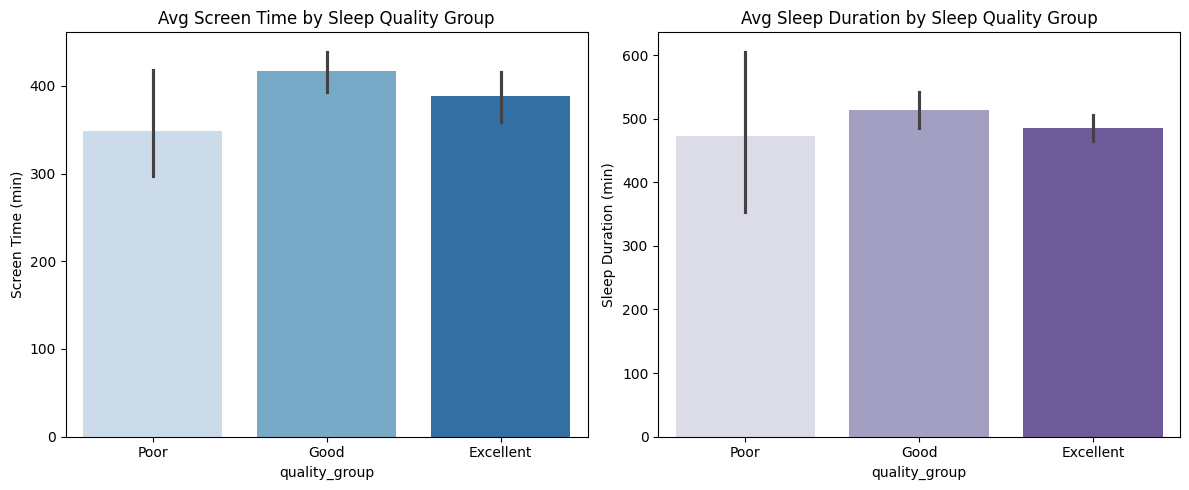

Average Screen Time and Sleep Duration by Sleep Quality Group:
               screen_time_min  sleeptime_min
quality_group                                
Excellent                388.3          485.5
Good                     416.4          513.4
Poor                     348.5          473.4


In [29]:
sleep_df = pd.read_csv("Formatted_Sleep_Data.csv")
screen_df = pd.read_csv("Alya_screentime.csv")

sleep_df["date"] = pd.to_datetime(sleep_df["date"])
screen_df["DATE"] = pd.to_datetime(screen_df["DATE"])
screen_df.rename(columns={"DATE": "date", "TIME(min)": "screen_time_min"}, inplace=True)

merged_df = pd.merge(sleep_df, screen_df, on="date", how="inner")
merged_df = merged_df.dropna(subset=["sleeptime_min", "sleep_quality", "screen_time_min"])

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.plot(merged_df["date"], merged_df["sleeptime_min"], label="Sleep Duration (min)", color="royalblue", marker='o')
ax1.set_ylabel("Sleep Duration (min)", color="royalblue")
ax1.tick_params(axis='y', labelcolor="royalblue")

ax2 = ax1.twinx()
ax2.plot(merged_df["date"], merged_df["sleep_quality"], label="Sleep Quality (%)", color="darkorange", marker='x')
ax2.set_ylabel("Sleep Quality (%)", color="darkorange")
ax2.tick_params(axis='y', labelcolor="darkorange")

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.plot(merged_df["date"], merged_df["screen_time_min"], label="Screen Time (min)", color="green", linestyle='--', marker='d')
ax3.set_ylabel("Screen Time (min)", color="green")
ax3.tick_params(axis='y', labelcolor="green")

plt.title("Daily Sleep Duration, Sleep Quality, and Screen Time Over Time")
fig.tight_layout()
plt.show()

correlation_matrix = merged_df[["screen_time_min", "sleeptime_min", "sleep_quality"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Screen Time, Sleep Duration, Sleep Quality")
plt.tight_layout()
plt.show()

def quality_category(q):
    if q >= 85:
        return "Excellent"
    elif q >= 70:
        return "Good"
    else:
        return "Poor"

merged_df["quality_group"] = merged_df["sleep_quality"].apply(quality_category)
quality_summary = merged_df.groupby("quality_group")[["screen_time_min", "sleeptime_min"]].mean().round(1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(legend=False, data=merged_df, x="quality_group", y="screen_time_min", order=["Poor", "Good", "Excellent"], ax=axes[0], palette="Blues")
axes[0].set_title("Avg Screen Time by Sleep Quality Group")
axes[0].set_ylabel("Screen Time (min)")

sns.barplot(legend=False, data=merged_df, x="quality_group", y="sleeptime_min", order=["Poor", "Good", "Excellent"], ax=axes[1], palette="Purples")
axes[1].set_title("Avg Sleep Duration by Sleep Quality Group")
axes[1].set_ylabel("Sleep Duration (min)")

plt.tight_layout()
plt.show()

print("Average Screen Time and Sleep Duration by Sleep Quality Group:")
print(quality_summary)


In [30]:
from scipy.stats import pearsonr

sleep_df = pd.read_csv("Formatted_Sleep_Data.csv")
screen_df = pd.read_csv("Alya_screentime.csv")

sleep_df["date"] = pd.to_datetime(sleep_df["date"])
screen_df["DATE"] = pd.to_datetime(screen_df["DATE"])
screen_df.rename(columns={"DATE": "date", "TIME(min)": "screen_time_min"}, inplace=True)

merged_df = pd.merge(sleep_df, screen_df, on="date", how="inner")
merged_df = merged_df.dropna(subset=["sleeptime_min", "sleep_quality", "screen_time_min"])

variables = ["screen_time_min", "sleeptime_min", "sleep_quality"]
exclude_pair = ("sleeptime_min", "sleep_quality")

print(" Pearson Correlation & Hypothesis Test Results:\n")

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        if (var1, var2) == exclude_pair or (var2, var1) == exclude_pair:
            continue

        r, p = pearsonr(merged_df[var1], merged_df[var2])

        print(f"Correlation between {var1} and {var2}:")
        print(f" → r = {r:.3f} (strength of relationship)")
        print(f" → p-value = {p:.4f} (significance level)")

        if p < 0.05:
            print("Result: Statistically significant. We reject the null hypothesis, a correlation exists.\n")
        else:
            print("Result: Not statistically significant. We fail to reject the null hypothesis, no strong evidence of correlation.\n")


 Pearson Correlation & Hypothesis Test Results:

Correlation between screen_time_min and sleeptime_min:
 → r = -0.012 (strength of relationship)
 → p-value = 0.9162 (significance level)
Result: Not statistically significant. We fail to reject the null hypothesis, no strong evidence of correlation.

Correlation between screen_time_min and sleep_quality:
 → r = 0.045 (strength of relationship)
 → p-value = 0.6909 (significance level)
Result: Not statistically significant. We fail to reject the null hypothesis, no strong evidence of correlation.

